# Gaussian mixture models

## Load the dataset

In [5]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
for key, value in faces.items():
    try:
        print(key, value.shape)
    except:
        pass

data (400, 4096)
images (400, 64, 64)
target (400,)


## Apply PCA to reduce the dimensionality

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
data_reduced = pca.fit_transform(faces['data'])
data_reduced.shape

(400, 260)

## Train a Guassian mixture model

In [7]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(data_reduced)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

## Get the mixture model to create new faces

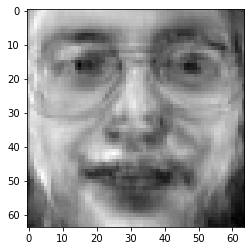

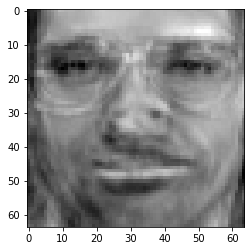

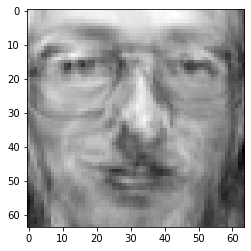

In [20]:
import matplotlib.pyplot as plt

for i in range(3):
    new_face, new_lable = gm.sample()
    new_face = pca.inverse_transform(new_face)
    new_face = new_face.reshape(64, 64)
    plt.imshow(new_face, cmap='gray')
    plt.show()

## Use the mixture model to test for anomolies
### First look at the log likelihood of actual images

In [35]:
training_set_log_likelihood = gm.score_samples(data_reduced)

print(training_set_log_likelihood.mean())
print(training_set_log_likelihood.std())

682.0456911674762
199.0781280385686


### Now check the likelihood of some artificial images

In [54]:
import numpy as np

required_shape = data_reduced[0,:].shape
required_shape

all_zeros = np.zeros(required_shape)
all_ones = np.ones(required_shape)

gm.score_samples([all_zeros, all_ones, data_reduced[0,:], 1.1*data_reduced[0,:]])

array([-6.09806480e+04, -3.44302662e+07,  7.73083678e+02, -2.47636717e+03])

## Use PCA reconstruction error to find anomalies

In [59]:
from sklearn.metrics import mean_squared_error

reconstructed_data = pca.inverse_transform(data_reduced)
mean_squared_error(faces['data'], reconstructed_data)

0.00019257102

In [67]:
mean_squared_error(faces['data'][0,:], pca.inverse_transform(10*data_reduced[0,:]))

1.6773378